In [50]:
import warnings

import h2o
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h2o.automl import H2OAutoML
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings("ignore")


In [51]:
# Carga de datos
df_survey = pd.read_pickle(filepath_or_buffer="data/df_survey.pkl")
y = "covid19"
ignore = ["covid19"]
x = list(set(df_survey.columns) - set(ignore))


In [52]:
# Define the numeric and categorical features
numeric_features = [
    "id_bio_age",
    "id_bio_weight",
    "id_bio_height",
    "id_mat_18p_house_members",
    "id_mat_total_house_members",
]
categorical_features = list(set(x) - set(numeric_features))

# scaler = StandardScaler()
# df_survey_imputed_num = pd.DataFrame(
#     scaler.fit_transform(df_survey[x]), columns=x)
# imputer = KNNImputer(n_neighbors=10)
# df_survey_imputed_num = pd.DataFrame(
#     imputer.fit_transform(df_survey[numeric_features]), columns=numeric_features
# )
# df_survey_imputed_num = df_survey_imputed_num[numeric_features]
# df_survey_imputed_num = pd.DataFrame(
#     imputer.fit_transform(df_survey_imputed_num), columns=df_survey_imputed_num.columns
# )

imputer = SimpleImputer(strategy="mean")
df_survey_imputed_num = pd.DataFrame(
    imputer.fit_transform(df_survey[numeric_features]), columns=numeric_features
)
df_survey_imputed_num = df_survey_imputed_num[numeric_features]

# Define the transformers for numeric and categorical features
# numeric_transformer = Pipeline(
#     # steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
#     steps=[("imputer", KNNImputer(n_neighbors=5)), ("scaler", StandardScaler())]
# )

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit and transform the data
df_survey_imputed_cat = preprocessor.fit_transform(df_survey[x])

df_survey_imputed = pd.DataFrame(
    np.concatenate([df_survey_imputed_num, df_survey_imputed_cat], axis=1),
    columns=numeric_features + categorical_features,
)

df_survey_imputed.head()


,id_bio_age,id_bio_weight,id_bio_height,id_mat_18p_house_members,id_mat_total_house_members,sd_inc_income_level,id_bio_out_bubble_contag,id_bio_vacc_status,sd_cul_holiday_season,sd_edu_level,...,sd_inc_income_problems,id_beh_risk_others,id_bio_disability,id_bio_death_covid,id_beh_risk_personal,id_psy_vacc_myths,id_bio_comorbidities,id_psy_anxiety_sympt,id_bio_bubble_contag,sd_cul_religion
0,52.0,83.0,178.0,3.0,3.0,2.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,68.0,68.0,171.0,3.0,3.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,36.0,90.0,171.0,2.0,3.0,2.0,1.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,78.0,57.0,150.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20.0,78.0,180.0,5.0,5.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


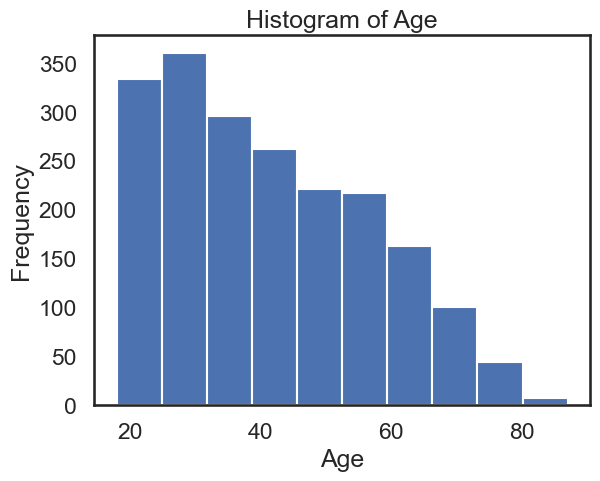

In [53]:
plt.hist(df_survey_imputed.id_bio_age)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


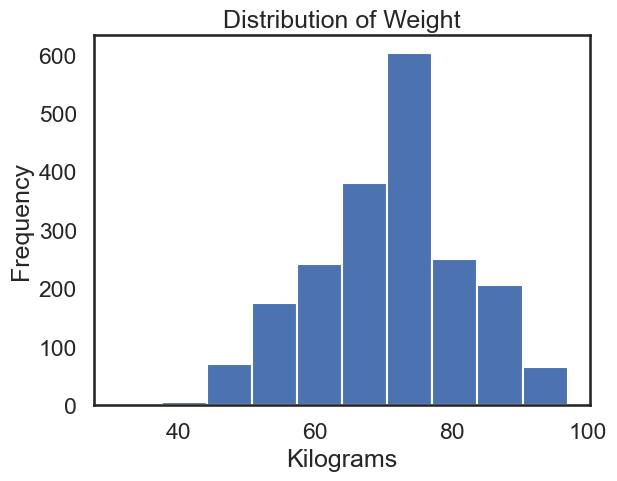

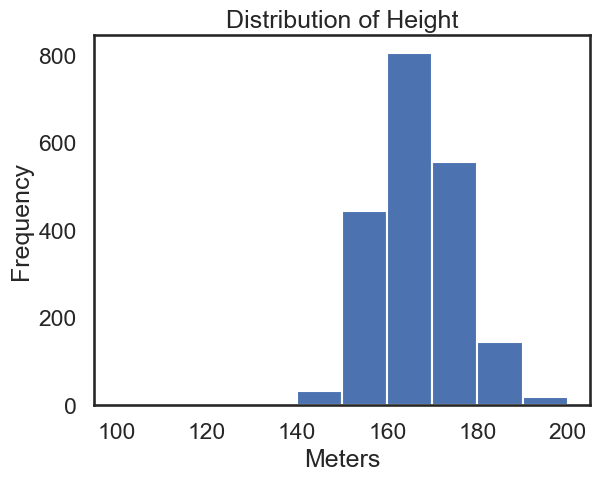

Text(0.5, 1.0, 'Distribution of BMI')

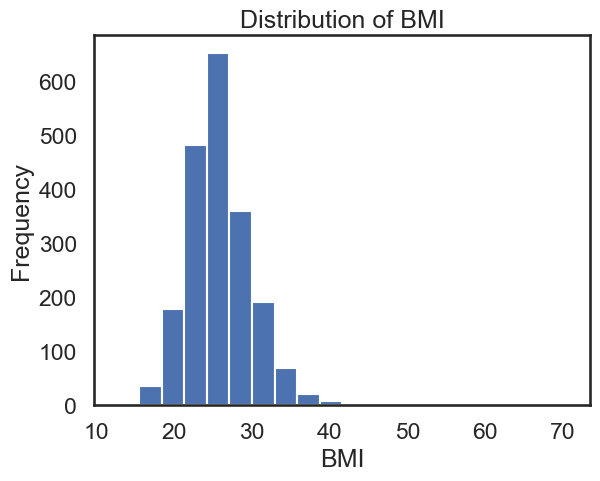

In [54]:
# Plot the distribution of weight
plt.hist(df_survey_imputed.id_bio_weight)
plt.xlabel("Kilograms")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")
plt.show()

# Plot the distribution of height
plt.hist(df_survey_imputed.id_bio_height)
plt.xlabel("Meters")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()

# Calculate the BMI and plot its distribution
df_survey_imputed["id_bio_bmi"] = (
    df_survey_imputed["id_bio_weight"] /
    (df_survey_imputed["id_bio_height"] / 100) ** 2
)
plt.hist(df_survey_imputed.id_bio_bmi, bins=20)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Distribution of BMI")


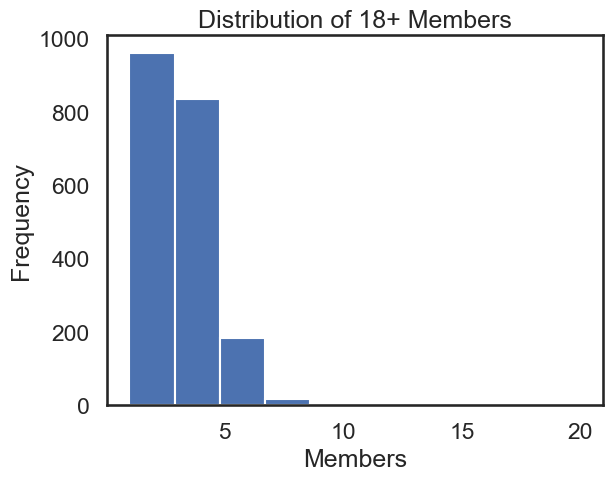

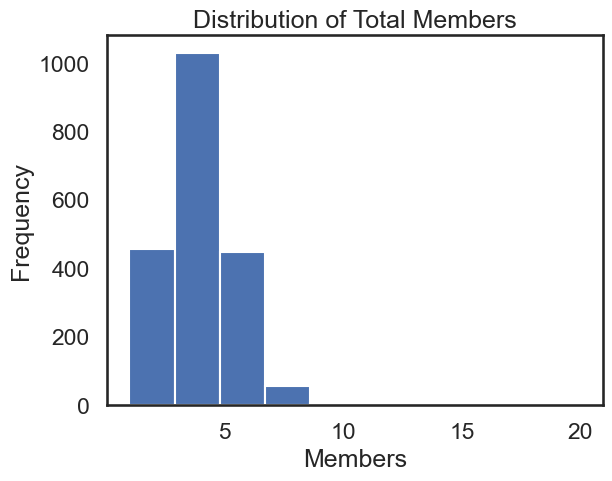

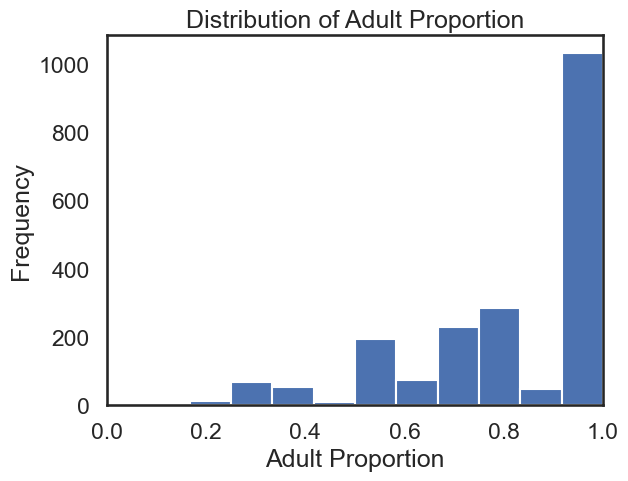

In [55]:
plt.hist(df_survey_imputed.id_mat_18p_house_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of 18+ Members")
plt.show()

plt.hist(df_survey_imputed.id_mat_total_house_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of Total Members")
plt.show()

df_survey_imputed["id_mat_adult_prop"] = (
    df_survey_imputed["id_mat_18p_house_members"]
    / df_survey_imputed["id_mat_total_house_members"]
)

df_survey_imputed = df_survey_imputed.assign(
    id_mat_adult_prop=lambda df: np.where(
        df["id_mat_adult_prop"] > 1, 1, df["id_mat_adult_prop"]
    )
)

plt.hist(df_survey_imputed.id_mat_adult_prop, bins=10)
plt.xlabel("Adult Proportion")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.title("Distribution of Adult Proportion")
plt.show()


In [56]:
# Clean unused variables

df_survey_imputed = df_survey_imputed.drop(
    columns=[
        "id_bio_weight",
        "id_bio_height",
        "id_mat_18p_house_members",
        "id_mat_total_house_members",
    ]
)
df_survey_imputed.head()


,id_bio_age,sd_inc_income_level,id_bio_out_bubble_contag,id_bio_vacc_status,sd_cul_holiday_season,sd_edu_level,id_bio_gender,id_beh_percep_severity,sd_eth_is_costa_rican,sd_occ_current_job,...,id_bio_disability,id_bio_death_covid,id_beh_risk_personal,id_psy_vacc_myths,id_bio_comorbidities,id_psy_anxiety_sympt,id_bio_bubble_contag,sd_cul_religion,id_bio_bmi,id_mat_adult_prop
0,52.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,26.196187,1.000000
1,68.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.255019,1.000000
2,36.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,30.778701,0.666667
3,78.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.333333,1.000000
4,20.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.074074,1.000000


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    df_survey_imputed,
    df_survey[y],
    test_size=0.2,
    random_state=40,
    stratify=df_survey[y],
)


print("#" * 5 + " Split sample " + "#" * 5)
print("train:%d, test:%d" % (len(y_train.index), len(y_test.index)))
print("#" * 5 + " Distribution Train Sample " + "#" * 5)
print(y_train.value_counts() / len(y_train))
print("#" * 5 + " Distribution Test Sample " + "#" * 5)
print(y_test.value_counts() / len(y_test))

train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)


##### Split sample #####
train:1602, test:401
##### Distribution Train Sample #####
covid19
False    0.730961
True     0.269039
Name: count, dtype: float64
##### Distribution Test Sample #####
covid19
False    0.730673
True     0.269327
Name: count, dtype: float64


In [58]:
df_survey_imputed.columns.sort_values().tolist()


['id_beh_percep_contag',
 'id_beh_percep_severity',
 'id_beh_physical_act',
 'id_beh_risk_others',
 'id_beh_risk_personal',
 'id_bio_age',
 'id_bio_bmi',
 'id_bio_bubble_contag',
 'id_bio_comorbidities',
 'id_bio_death_covid',
 'id_bio_disability',
 'id_bio_gender',
 'id_bio_out_bubble_contag',
 'id_bio_vacc_status',
 'id_mat_adult_prop',
 'id_psy_anxiety_sympt',
 'id_psy_vacc_myths',
 'sd_cul_holiday_season',
 'sd_cul_religion',
 'sd_edu_level',
 'sd_eth_is_costa_rican',
 'sd_inc_income_level',
 'sd_inc_income_problems',
 'sd_occ_current_job']

In [59]:
categorical_features


['sd_inc_income_level',
 'id_bio_out_bubble_contag',
 'id_bio_vacc_status',
 'sd_cul_holiday_season',
 'sd_edu_level',
 'id_bio_gender',
 'id_beh_percep_severity',
 'sd_eth_is_costa_rican',
 'sd_occ_current_job',
 'id_beh_physical_act',
 'id_beh_percep_contag',
 'sd_inc_income_problems',
 'id_beh_risk_others',
 'id_bio_disability',
 'id_bio_death_covid',
 'id_beh_risk_personal',
 'id_psy_vacc_myths',
 'id_bio_comorbidities',
 'id_psy_anxiety_sympt',
 'id_bio_bubble_contag',
 'sd_cul_religion']

In [60]:
import skimpy

bool_variables = [
    "id_bio_bubble_contag",
    "id_bio_death_covid",
    "id_bio_vacc_status",
    "sd_inc_income_problems",
    "id_bio_gender",
    "sd_occ_current_job",
    "sd_eth_is_costa_rican",
    "id_bio_comorbidities",
    "sd_cul_religion",
    "id_bio_disability",
]
cat012_variables = list(
    set(
        [
            "id_psy_anxiety_sympt",
            "id_bio_disability",
            "id_psy_vacc_myths",
            "sd_eth_is_costa_rican",
            "sd_occ_current_job",
            "id_beh_risk_others",
            "id_bio_bubble_contag",
            "id_beh_physical_act",
            "sd_cul_holiday_season",
            "sd_inc_income_level",
            "id_beh_percep_contag",
            "id_beh_risk_personal",
            "id_bio_out_bubble_contag",
            "sd_cul_religion",
            "id_beh_percep_severity",
            "id_bio_comorbidities",
            "id_bio_vacc_status",
            "id_bio_gender",
            "sd_edu_level",
            "id_bio_death_covid",
            "sd_inc_income_problems",
        ]
    )
    - set(bool_variables)
)
df = df_survey_imputed.copy()
df[bool_variables] = df[bool_variables].astype("bool")
cat_012_ord = pd.CategoricalDtype(categories=[0, 1, 2], ordered=True)
df[cat012_variables] = df[cat012_variables].astype("category")


# select only categorical and boolean columns
cat_cols = df.select_dtypes(include=["category", "bool"]).columns

# create an empty data frame to store the results
result_df = pd.DataFrame(columns=["Count", "Percentage"])

# iterate over each categorical or boolean column
for col in cat_cols:
    # count the number of occurrences of each value in the column
    value_counts = df[col].value_counts()
    # calculate the percentage of each value with respect to the total
    percentages = value_counts / len(df) * 100
    # combine the count and percentage into a single string
    count_percentage = (
        value_counts.astype(
            str) + " (" + percentages.round(2).astype(str) + "%)"
    )
    # add the count and percentage to the result data frame
    result_df.loc[col] = [value_counts.sum(), count_percentage.to_dict()]

# display the result data frame
print(result_df.to_latex(escape=False))

# # Frequency tables for each categorical feature
# for column in df.select_dtypes(include=["bool", "category"]).columns:
#     display(
#         pd.crosstab(index=df[column],
#                     columns="% observations", normalize="columns").T
#         * 100
#     )
#     display(pd.crosstab(index=df[column], columns="count").T)

# display(df.describe().T)


\begin{tabular}{lrl}
\toprule
 & Count & Percentage \\
\midrule
sd_inc_income_level & 2003 & {2.0: '1079 (53.87%)', 1.0: '557 (27.81%)', 0.0: '367 (18.32%)'} \\
id_bio_out_bubble_contag & 2003 & {1.0: '1518 (75.79%)', 0.0: '485 (24.21%)'} \\
id_bio_vacc_status & 2003 & {False: '1837 (91.71%)', True: '166 (8.29%)'} \\
sd_cul_holiday_season & 2003 & {2.0: '1708 (85.27%)', 1.0: '209 (10.43%)', 0.0: '86 (4.29%)'} \\
sd_edu_level & 2003 & {0.0: '778 (38.84%)', 1.0: '764 (38.14%)', 2.0: '461 (23.02%)'} \\
id_bio_gender & 2003 & {False: '1076 (53.72%)', True: '927 (46.28%)'} \\
id_beh_percep_severity & 2003 & {2.0: '762 (38.04%)', 0.0: '627 (31.3%)', 1.0: '614 (30.65%)'} \\
sd_eth_is_costa_rican & 2003 & {True: '1766 (88.17%)', False: '237 (11.83%)'} \\
sd_occ_current_job & 2003 & {True: '1375 (68.65%)', False: '628 (31.35%)'} \\
id_beh_physical_act & 2003 & {1.0: '978 (48.83%)', 0.0: '814 (40.64%)', 2.0: '211 (10.53%)'} \\
id_beh_percep_contag & 2003 & {2.0: '789 (39.39%)', 1.0: '707 (35.3%)

In [61]:
# create a copy of the original data frame
df = df_survey_imputed.copy()


In [62]:
# Inicializar h2o
# h2o.cluster().shutdown()

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,53 mins 41 secs
H2O_cluster_timezone:,America/Costa_Rica
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_maikol_9s2mnm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.116 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [63]:
train.columns


Index(['covid19', 'id_bio_age', 'sd_inc_income_level',
       'id_bio_out_bubble_contag', 'id_bio_vacc_status',
       'sd_cul_holiday_season', 'sd_edu_level', 'id_bio_gender',
       'id_beh_percep_severity', 'sd_eth_is_costa_rican', 'sd_occ_current_job',
       'id_beh_physical_act', 'id_beh_percep_contag', 'sd_inc_income_problems',
       'id_beh_risk_others', 'id_bio_disability', 'id_bio_death_covid',
       'id_beh_risk_personal', 'id_psy_vacc_myths', 'id_bio_comorbidities',
       'id_psy_anxiety_sympt', 'id_bio_bubble_contag', 'sd_cul_religion',
       'id_bio_bmi', 'id_mat_adult_prop'],
      dtype='object')

In [64]:
# Convertir a h2o
col_types = {
    "covid19": "enum",
    "id_beh_percep_contag": "enum",
    "id_beh_percep_severity": "enum",
    "id_bio_bubble_contag": "enum",
    "id_bio_out_bubble_contag": "enum",
    "id_bio_death_covid": "enum",
    "id_beh_risk_personal": "enum",
    "id_beh_risk_others": "enum",
    "id_beh_physical_act": "enum",
    "id_psy_vacc_myths": "enum",
    "id_bio_vacc_status": "enum",
    "id_psy_anxiety_sympt": "enum",
    "sd_inc_income_problems": "enum",
    "sd_inc_income_level": "enum",
    "sd_cul_holiday_season": "enum",
    "id_bio_gender": "enum",
    "id_bio_age": "numeric",
    "id_bio_bmi": "numeric",
    #    "id_bio_weight": "numeric",
    #   "id_bio_height": "numeric",
    "sd_edu_level": "enum",
    "sd_occ_current_job": "enum",
    "sd_eth_is_costa_rican": "enum",
    "id_bio_comorbidities": "enum",
    "sd_cul_religion": "enum",
    "id_bio_disability": "enum",
    "id_mat_adult_prop": "numeric",
    # "id_mat_18_plus_household_members": "numeric",
    # "id_mat_total_household_members": "numeric",
}

train_h2o = h2o.H2OFrame(train, column_types=col_types)
test_h2o = h2o.H2OFrame(test, column_types=col_types)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [65]:
train_h2o.types


{'covid19': 'enum',
 'id_bio_age': 'int',
 'sd_inc_income_level': 'enum',
 'id_bio_out_bubble_contag': 'enum',
 'id_bio_vacc_status': 'enum',
 'sd_cul_holiday_season': 'enum',
 'sd_edu_level': 'enum',
 'id_bio_gender': 'enum',
 'id_beh_percep_severity': 'enum',
 'sd_eth_is_costa_rican': 'enum',
 'sd_occ_current_job': 'enum',
 'id_beh_physical_act': 'enum',
 'id_beh_percep_contag': 'enum',
 'sd_inc_income_problems': 'enum',
 'id_beh_risk_others': 'enum',
 'id_bio_disability': 'enum',
 'id_bio_death_covid': 'enum',
 'id_beh_risk_personal': 'enum',
 'id_psy_vacc_myths': 'enum',
 'id_bio_comorbidities': 'enum',
 'id_psy_anxiety_sympt': 'enum',
 'id_bio_bubble_contag': 'enum',
 'sd_cul_religion': 'enum',
 'id_bio_bmi': 'real',
 'id_mat_adult_prop': 'real'}

In [66]:
# max_models = 1000
# excluded_algos = ["DeepLearning"]

# # Definir modelo y entrenar
# aml = H2OAutoML(
#     # nfolds=10,
#     nfolds=-1,
#     max_models=max_models,
#     max_runtime_secs=3600,
#     seed=42,
#     stopping_metric="aucpr",
#     sort_metric="aucpr",
#     balance_classes=False,
#     exclude_algos=excluded_algos,
# )
# aml.train(y=y, training_frame=train_h2o)
# h2o.save_model(
#     aml.leader,
#     path="models/",
#     force=True,
#     filename="aml_leader_model",
#     export_cross_validation_predictions=True,
# )


AutoML progress: |

███████████████████████████████████████████████████████████████| (done) 100%


'/Users/maikol/OneDrive/home/documents/2023/2023_03_paper_triageml_cr2021/Paper-COVID-MLTriage-CR2021/models/aml_leader_model'

In [67]:
if "aml" in locals() and isinstance(aml, h2o.automl.autoh2o.H2OAutoML):
    aml_leader = aml.leader
else:
    aml_leader = h2o.load_model("models/aml_leader_model")


In [68]:
aml_leader


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_3_20231012_145541_model_828


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    28                 28                          5137                   4            7            5.03571       7             11            10

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14006495853292034
RMSE: 0.3742525331015414
LogLoss: 0.4415589057251738
Mean Per-Class Error: 0.21374041264035537
AUC: 0.8626711657000877
AUCPR: 0.7027312369018273
Gini: 0.7253423314001755

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.342656978119921
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  972      199     0.1699   (199.0/1171.0)
True   111      320     0.2575   (111.0/431.0)
Total  1083     519     0.1935   (310.0/1602.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.342657     0.673684  190
max f2                       0.187743     0.774257  280
max f0point5                 0.480552     0.660517  97
max accuracy                 0.400447     0.812734  152
max precision                0.677503     1         0
max recall                   0.106975     1         390
max specificity              0.677503     1         0
max absolute_mcc             0.342657     0.542512  190
max min_per_class_accuracy   0.248653     0.781903  226
max mean_per_class_accuracy  0.212471     0.789481  254
max tns                      0.677503     1171      0
max fns                      0.677503     430       0
max fps                      0.0913368    1171      399
max tps                      0.106975     431       390
max tnr                      0.677503     1         0
max fnr                      0.677503     0.99768   0
max fpr                      0.0913368    1         399
max tpr                      0.106975     1         390

Gains/Lift Table: Avg response rate: 26.90 %, avg score: 26.88 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106117                   0.620813           3.71694    3.71694            1                0.647201  1                           0.647201            0.0394432       0.0394432                  271.694   271.694            0.0394432
2        0.0205993                   0.59833            3.48463    3.6043             0.9375           0.612056  0.969697                    0.630161            0.0348028       0.0742459                  248.463   260.43             0.073392
3        0.0305868                   0.57956            3.02001    3.41351            0.8125           0.58795   0.918367                    0.616378            0.0301624       0.104408                   202.001   241.351            0.100992
4        0.0405743                   0.569868           2.55539    3.20228            0.6875           0.574853  0.861538                    0.606156            0.025522        0.12993                    155.539   220.228            0.122245
5        0.0505618                   0.561662           2.7877     3.12039            0.75             0.564895  0.8

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20231012_145541_model_587,0.830015,0.439552,0.609408,0.215207,0.376344,0.141635,116,0.034508,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_606,0.827771,0.457079,0.601466,0.237628,0.384981,0.14821,284,0.029985,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_889,0.827313,0.445615,0.633391,0.218383,0.378281,0.143096,84,0.017439,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_678,0.827187,0.442044,0.587536,0.213484,0.376896,0.14205,74,0.024676,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_52,0.825465,0.461492,0.574509,0.21764,0.386194,0.149146,84,0.018424,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_250,0.824991,0.442486,0.598,0.21862,0.37749,0.142499,153,0.019402,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_330,0.824627,0.442681,0.596774,0.218383,0.377423,0.142448,75,0.021558,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_492,0.824437,0.440426,0.605394,0.212758,0.375309,0.140857,141,0.02008,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_199,0.824358,0.457978,0.662787,0.232019,0.382958,0.146657,181,0.022497,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_484,0.823474,0.444986,0.602799,0.227389,0.380873,0.145064,154,0.024364,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_3_20231012_145541_model_828

,False,True,Error,Rate
False,225.0,68.0,0.2321,(68.0/293.0)
True,22.0,86.0,0.2037,(22.0/108.0)
Total,247.0,154.0,0.2244,(90.0/401.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

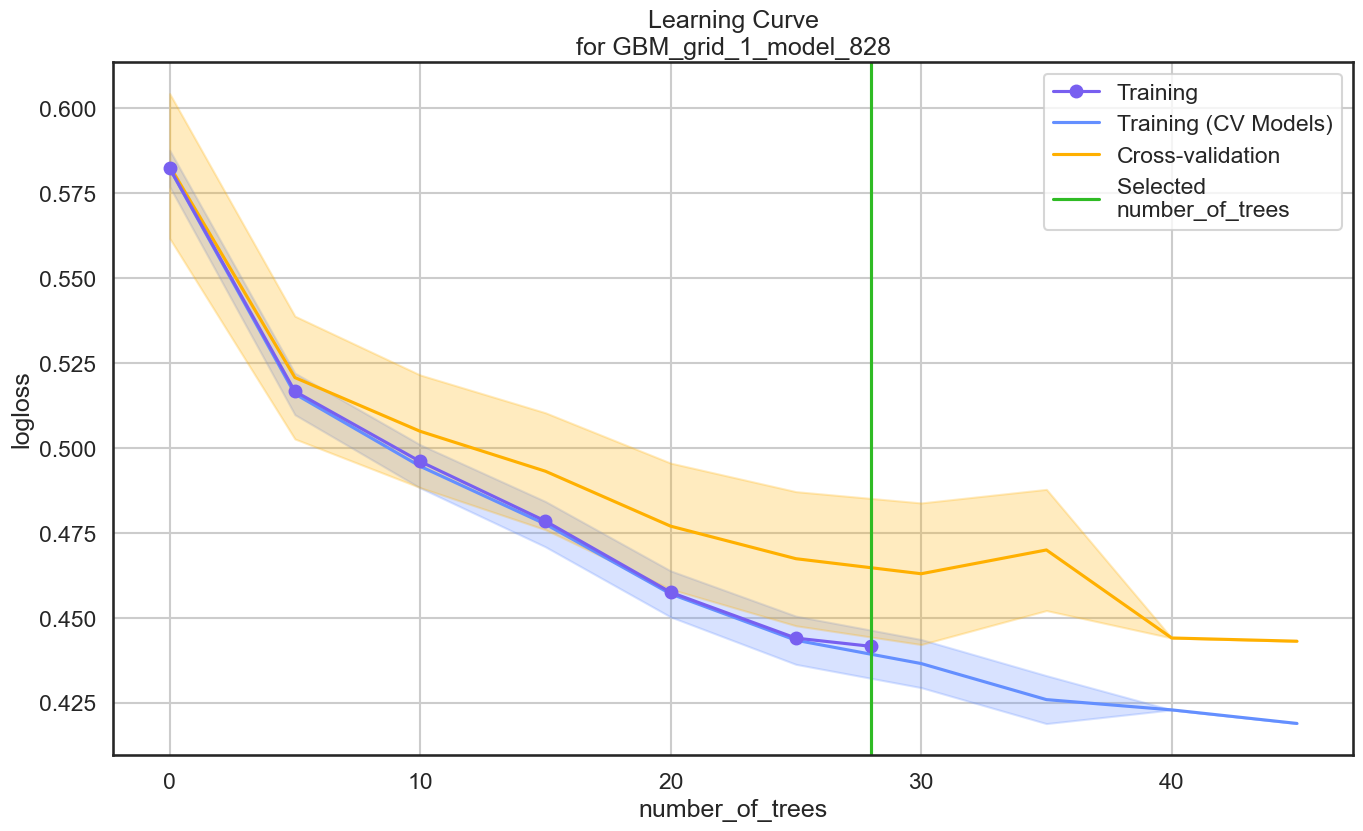

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

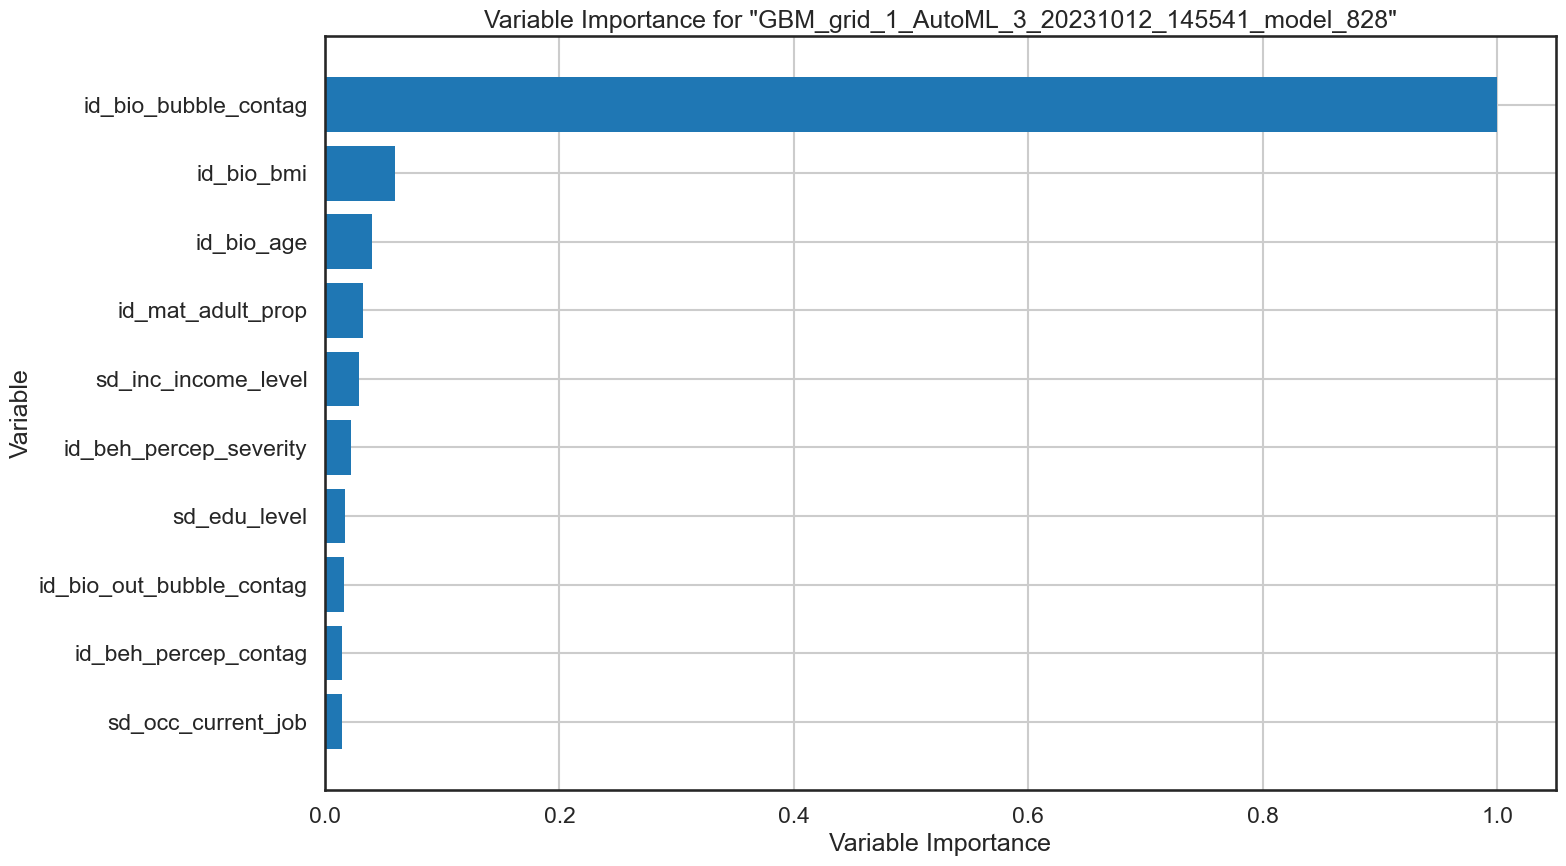

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

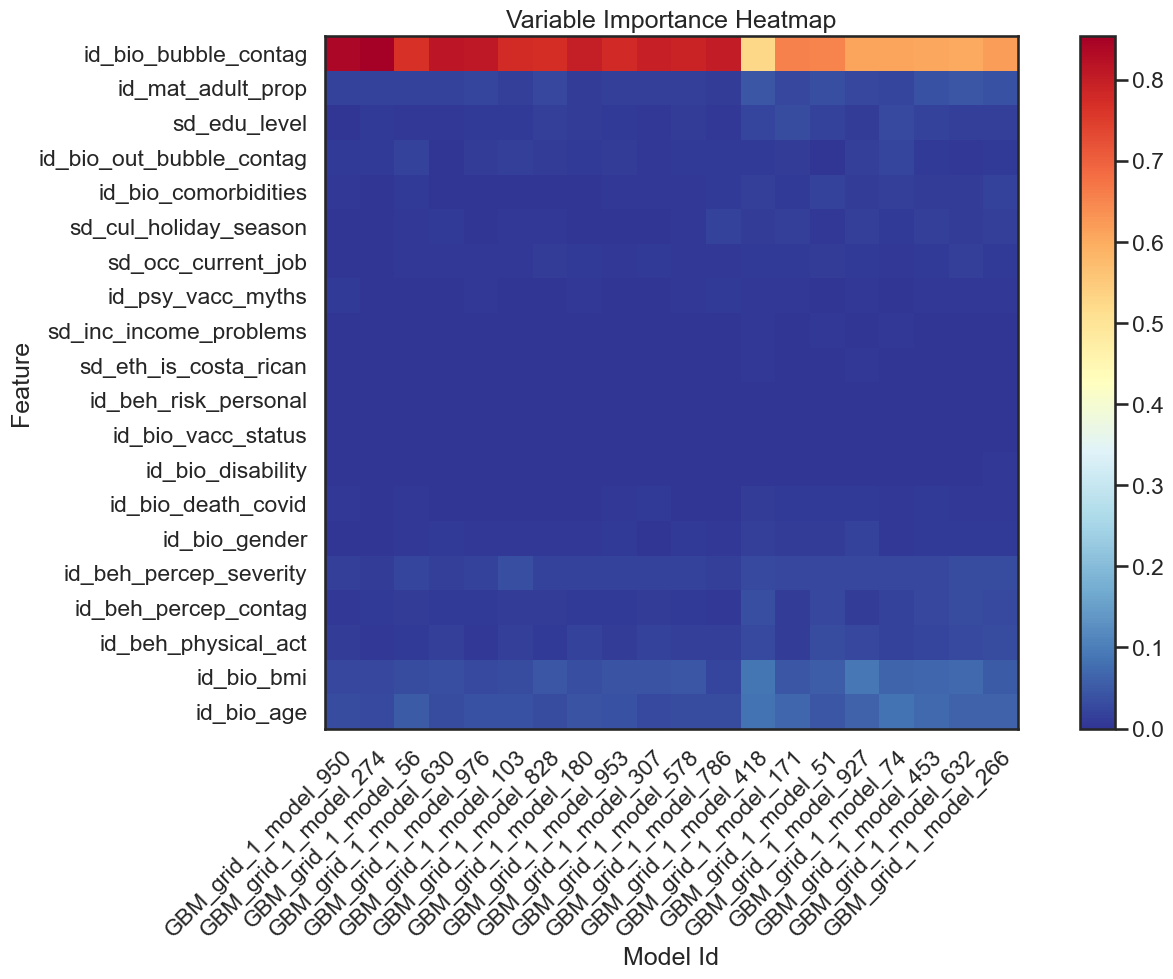

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

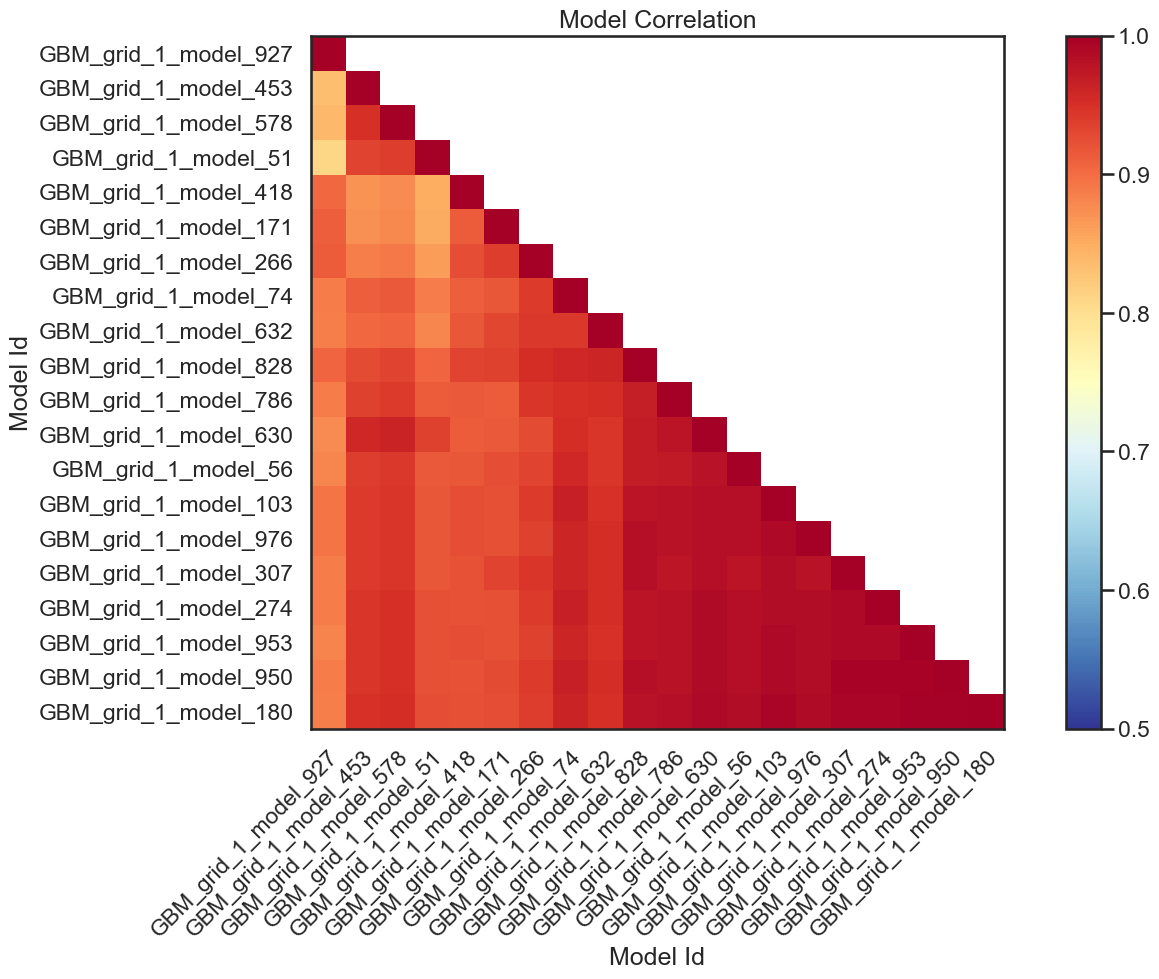

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

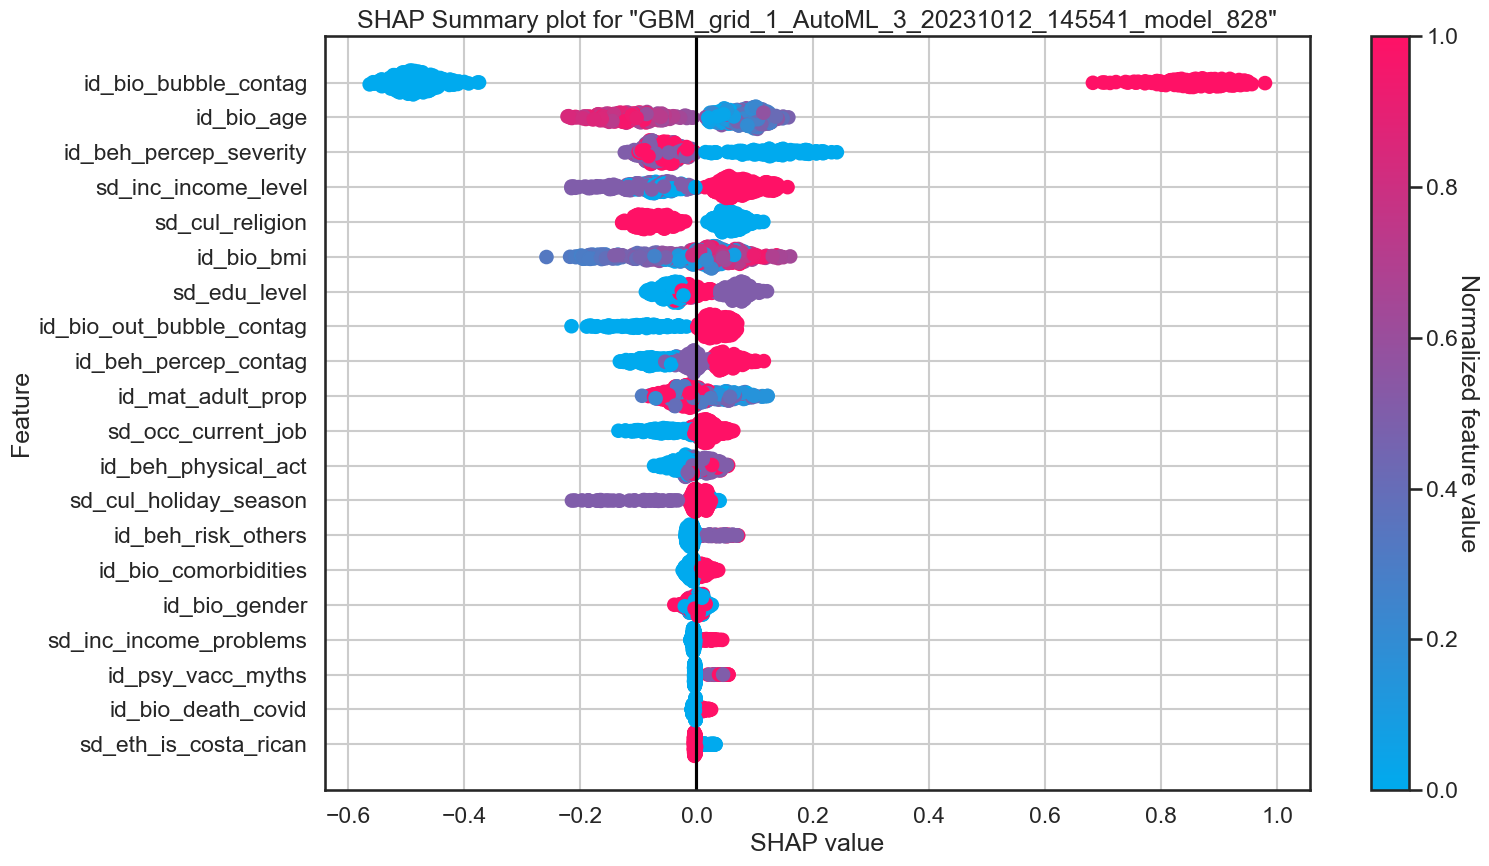

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

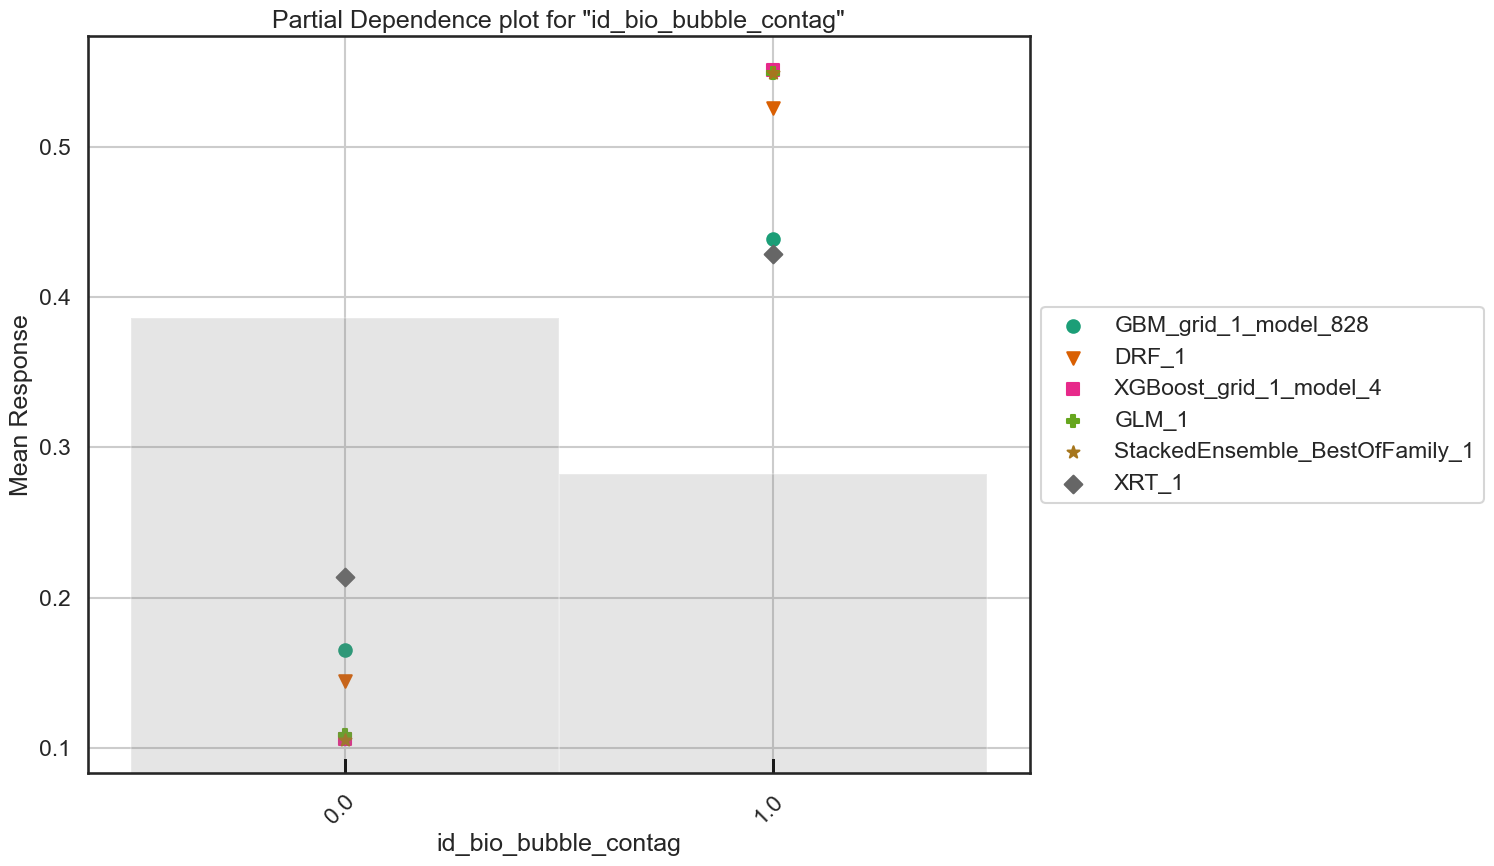

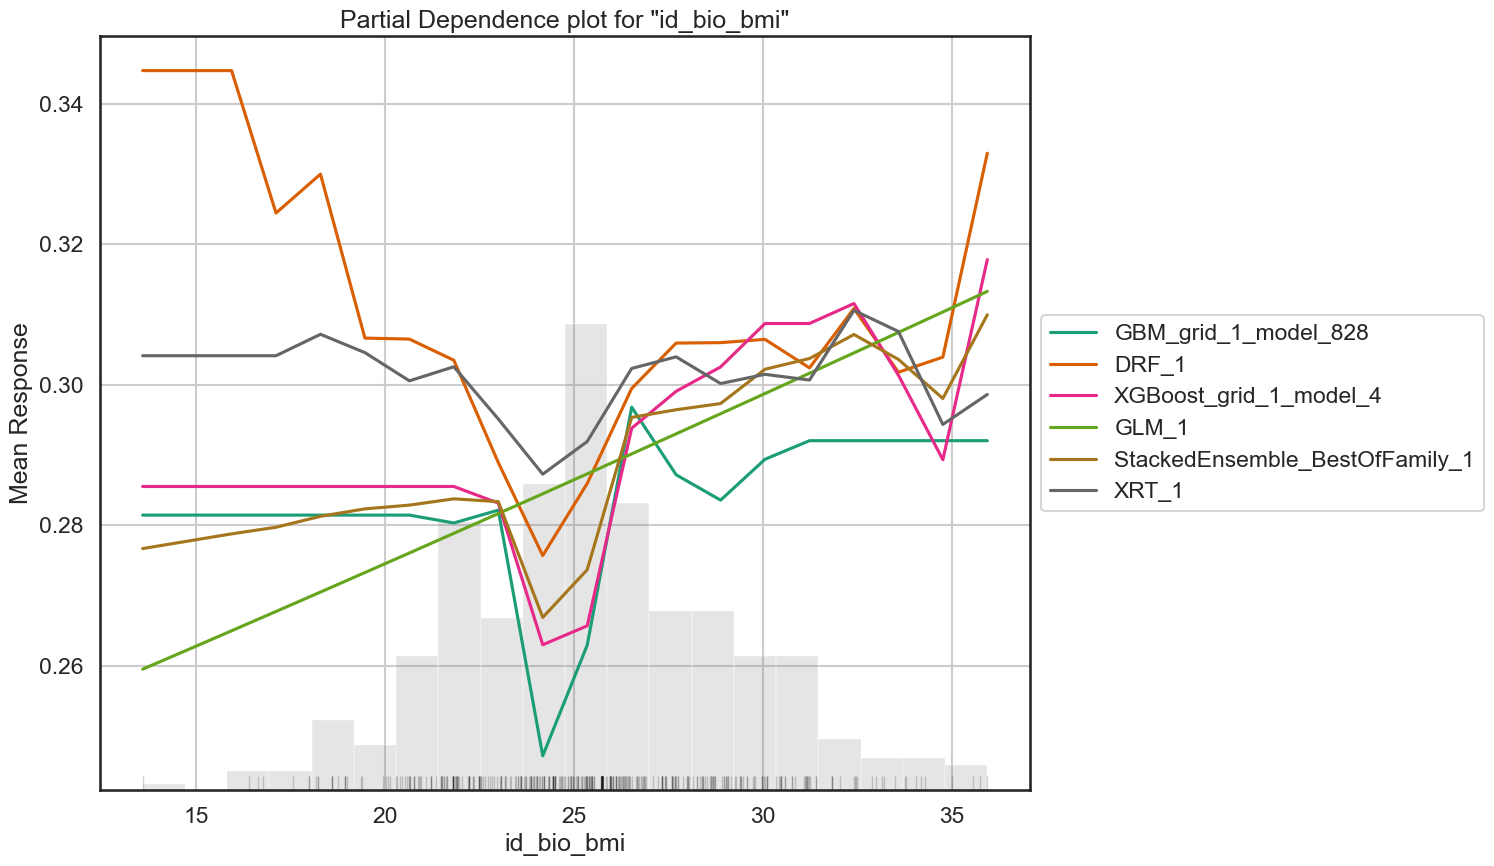

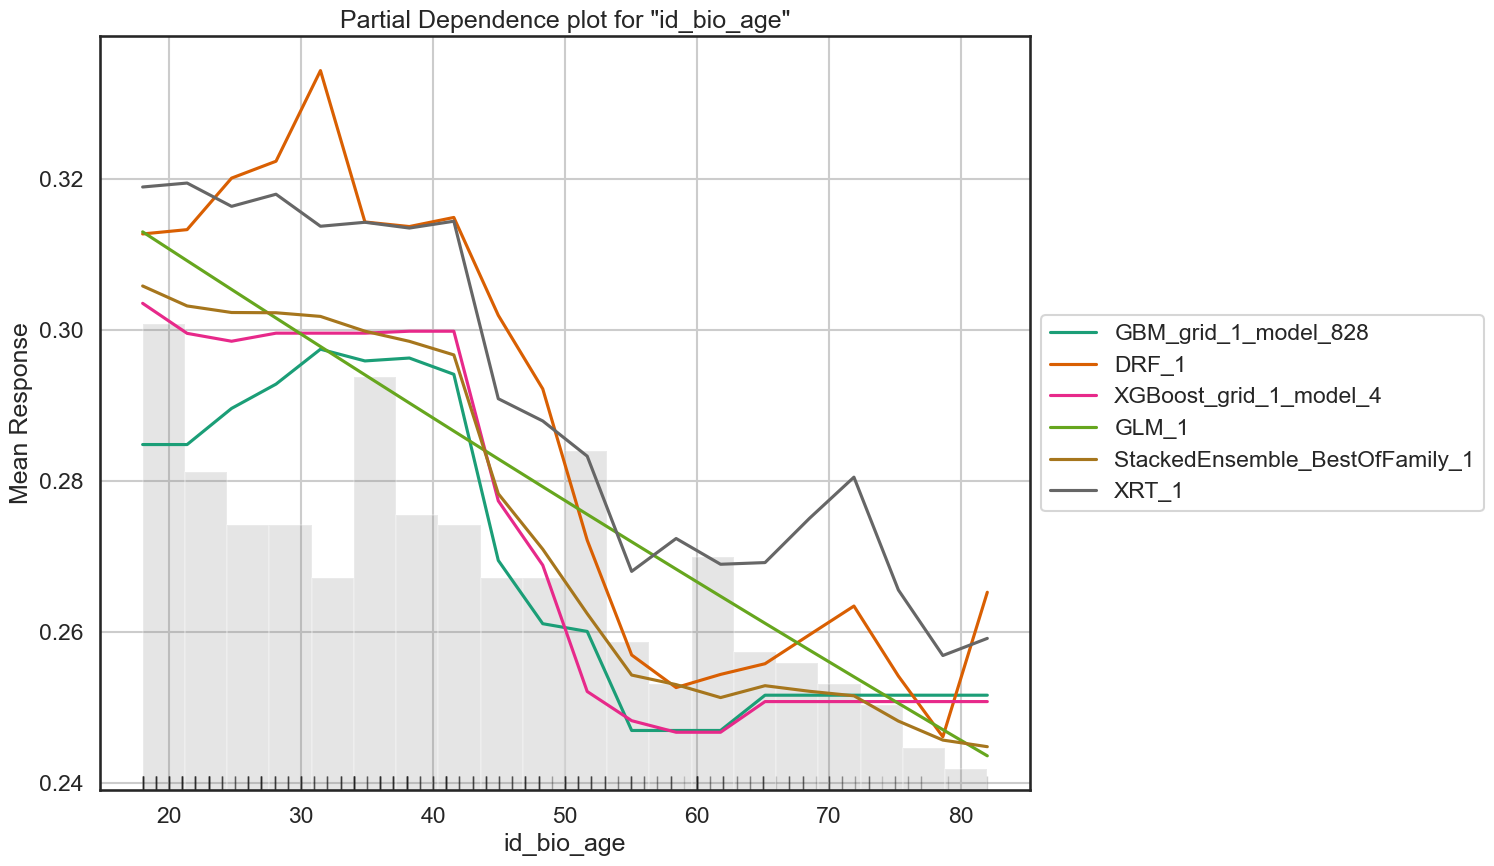

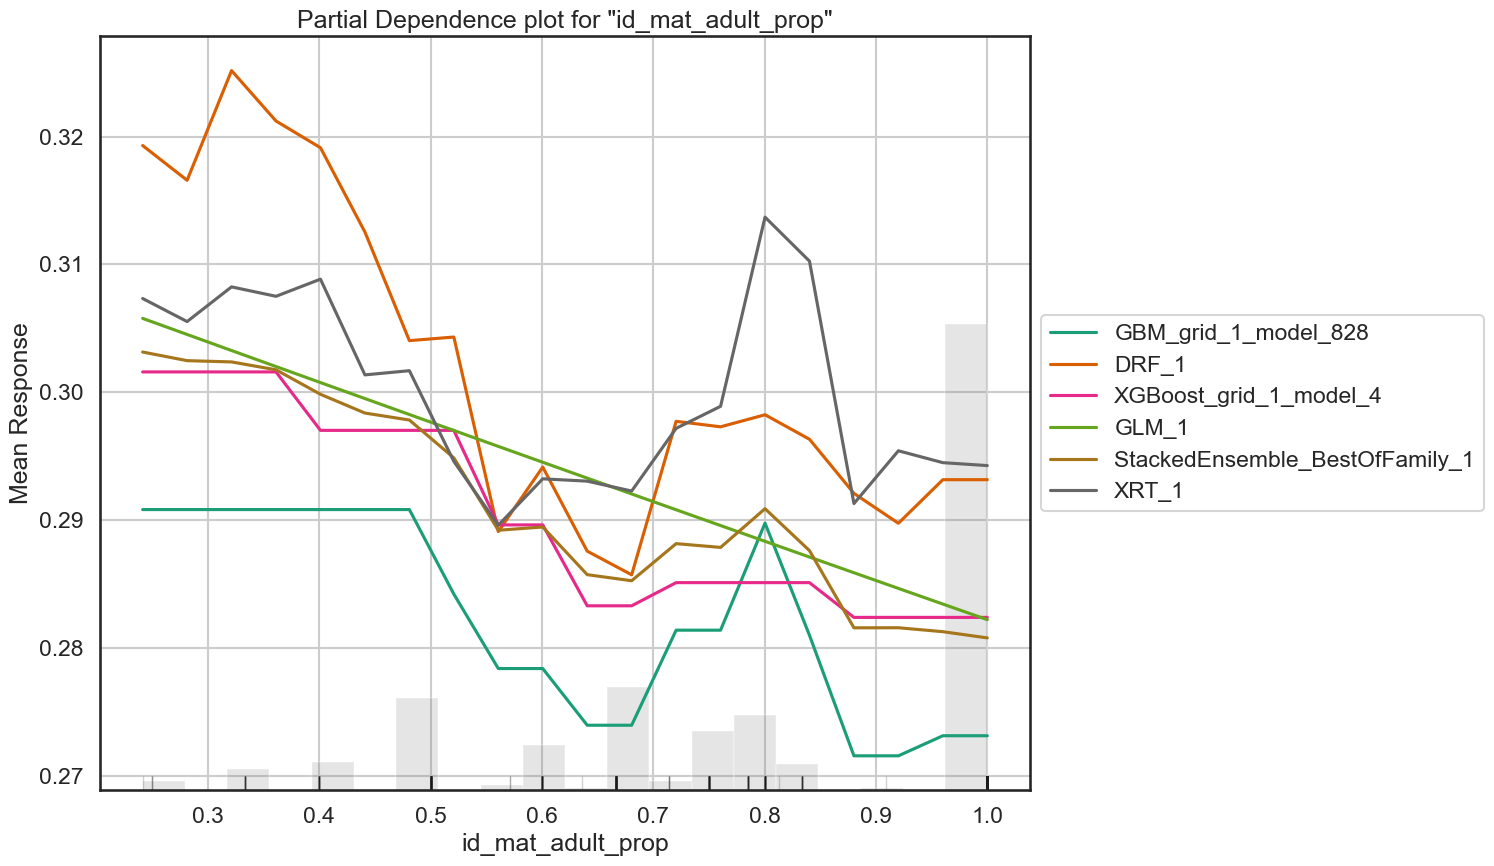

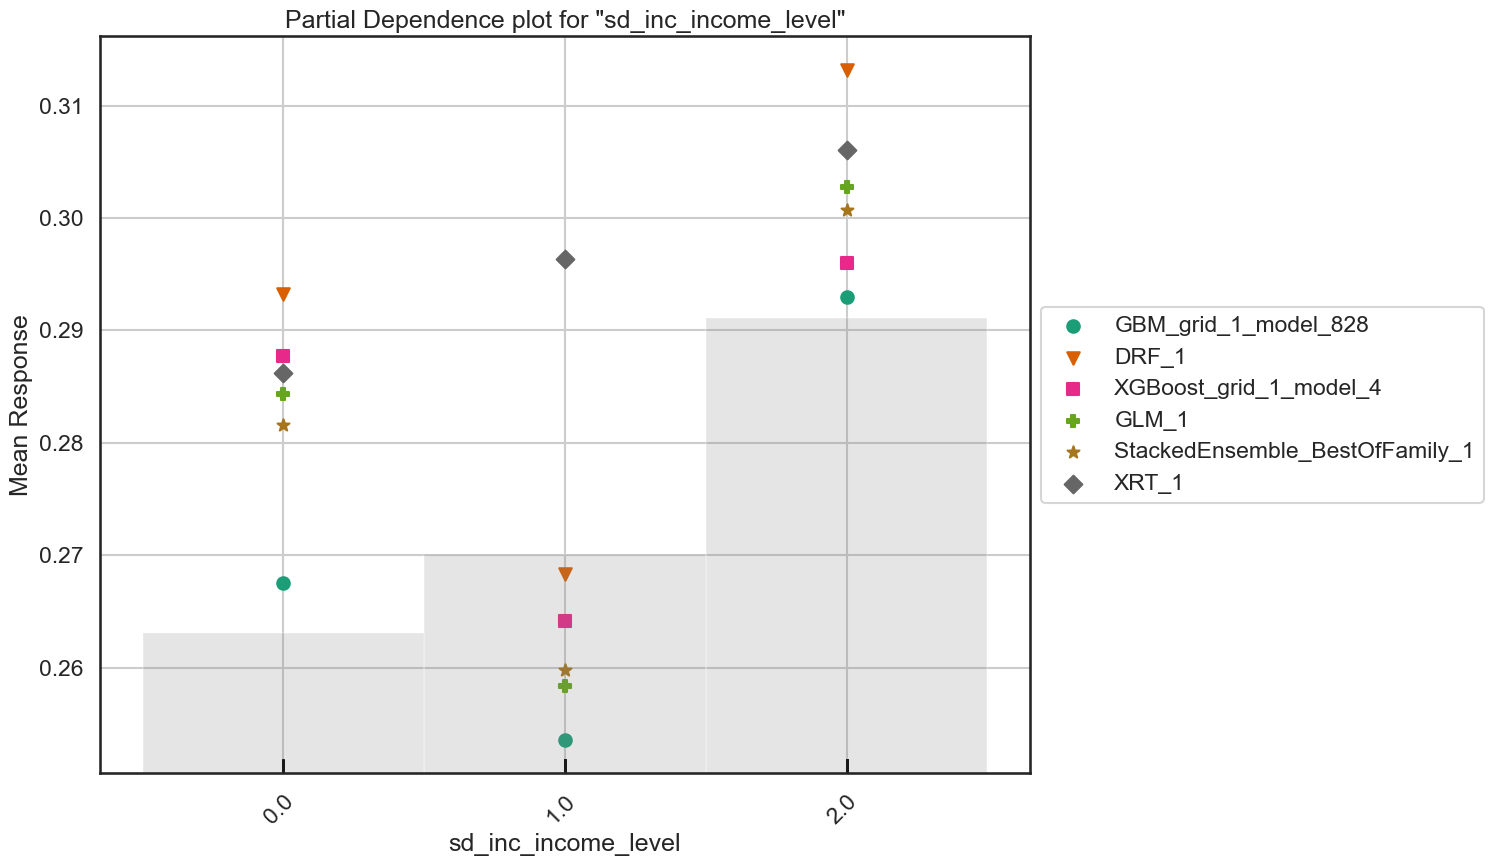

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_3_20231012_145541_model_587,0.830015,0.439552,0.609408,0.215207,0.376344,0.141635,116,0.034508,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_606,0.827771,0.457079,0.601466,0.237628,0.384981,0.14821,284,0.029985,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_889,0.827313,0.445615,0.633391,0.218383,0.378281,0.143096,84,0.017439,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_678,0.827187,0.442044,0.587536,0.213484,0.376896,0.14205,74,0.024676,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_52,0.825465,0.461492,0.574509,0.21764,0.386194,0.149146,84,0.018424,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_250,0.824991,0.442486,0.598,0.21862,0.37749,0.142499,153,0.019402,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_330,0.824627,0.442681,0.596774,0.218383,0.377423,0.142448,75,0.021558,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_492,0.824437,0.440426,0.605394,0.212758,0.375309,0.140857,141,0.02008,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_199,0.824358,0.457978,0.662787,0.232019,0.382958,0.146657,181,0.022497,GBM
GBM_grid_1_AutoML_3_20231012_145541_model_484,0.823474,0.444986,0.602799,0.227389,0.380873,0.145064,154,0.024364,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_3_20231012_145541_model_828

,False,True,Error,Rate
False,225.0,68.0,0.2321,(68.0/293.0)
True,22.0,86.0,0.2037,(22.0/108.0)
Total,247.0,154.0,0.2244,(90.0/401.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [83]:
aml.explain(test_h2o)


In [69]:
aml_leader.algo


'gbm'

In [70]:
aml_leader.save_model_details(
    path="models/", force=True, filename="aml_leader_model_details"
)


'/Users/maikol/OneDrive/home/documents/2023/2023_03_paper_triageml_cr2021/Paper-COVID-MLTriage-CR2021/models/aml_leader_model_details'

In [71]:
aml_leader.summary()


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,28.0,28.0,5137.0,4.0,7.0,5.035714,7.0,11.0,10.0


In [72]:
# Performance del modelo

perf = aml_leader.model_performance(test_data=test_h2o)
prevalence = sum(df_survey.covid19) / len(df_survey)
threshold = perf.F1()[0][0]
sensitivity = perf.recall(thresholds=[threshold])[0][1]
specificity = perf.specificity(thresholds=[threshold])[0][1]
F1 = perf.F1(thresholds=[threshold])[0][1]
F2 = perf.F2(thresholds=[threshold])[0][1]
AUC = perf.auc()
AUC_PR = perf.aucpr()
precision = perf.precision(thresholds=[threshold])[0][1]
accuracy = perf.accuracy(thresholds=[threshold])[0][1]


print("Prevalence", prevalence)
print("Threshold", threshold)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("F1:", F1)
print("F2:", F2)
print("AUC:", AUC)
print("AUC_PR:", AUC_PR)
print(perf.confusion_matrix(thresholds=[threshold]))


Prevalence 0.2690963554667998
Threshold 0.3285410851677757
Sensitivity: 0.7962962962962963
Specificity: 0.7679180887372014
Precision: 0.5584415584415584
Accuracy: 0.7755610972568578
F1: 0.6564885496183205
F2: 0.7337883959044369
AUC: 0.8001516875237012
AUC_PR: 0.5980018079146243
Confusion Matrix (Act/Pred) @ threshold = 0.3285410851677757
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  225      68      0.2321   (68.0/293.0)
True   22       86      0.2037   (22.0/108.0)
Total  247      154     0.2244   (90.0/401.0)


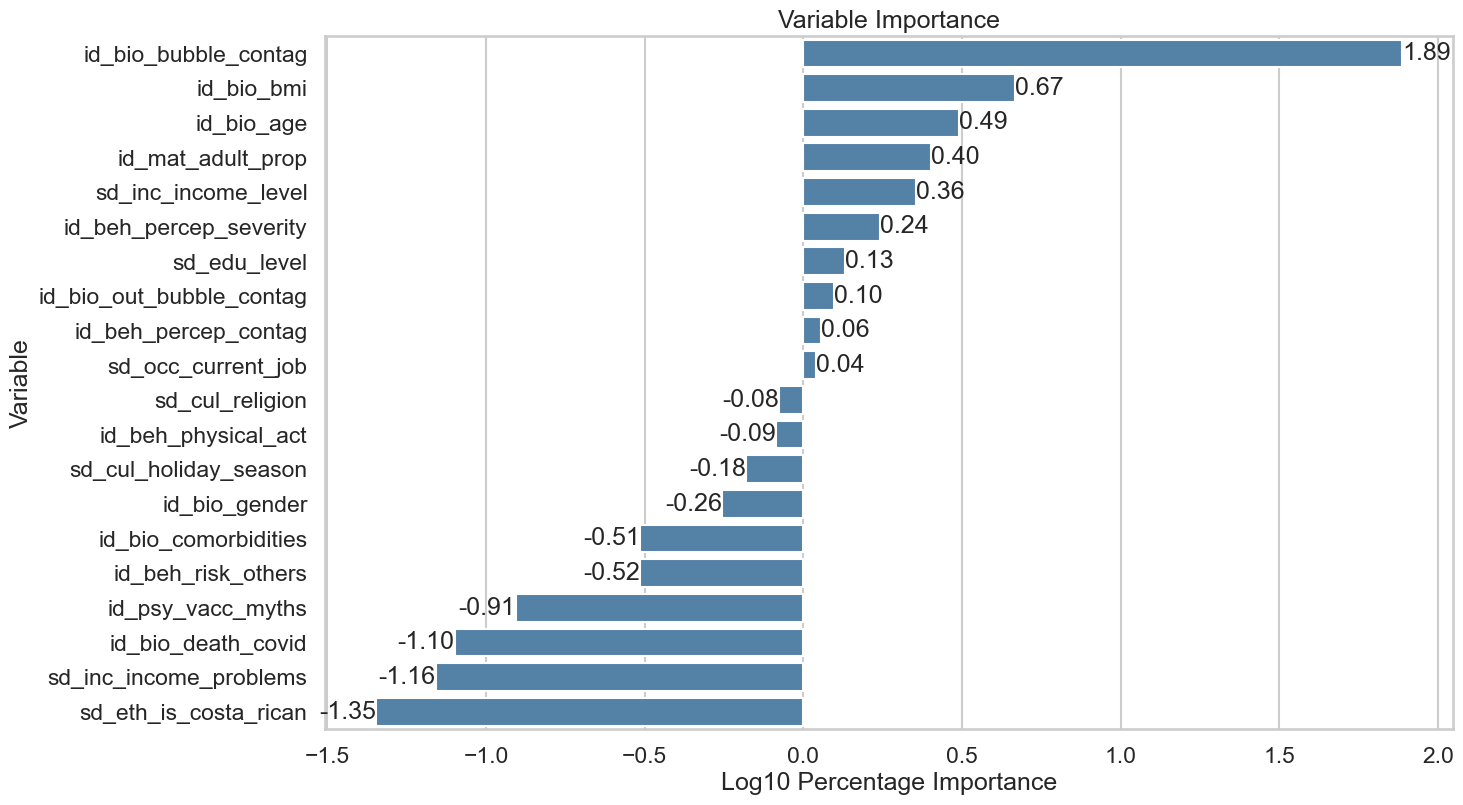

In [73]:
# Get variable importance data
var_imp = aml_leader.varimp(use_pandas=True)

# Filter only the variables with positive scaled_importance value
var_imp = var_imp[var_imp["percentage"] > 0]
var_imp["log_scaled_importance"] = np.log10(var_imp["percentage"] * 100)

h = 9
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(w, h))  # set the figure size
ax = sns.barplot(
    x="log_scaled_importance", y="variable", data=var_imp, color="steelblue"
)
ax.bar_label(ax.containers[0], fmt="%.2f")

# Set informative labels for the plot
plt.title("Variable Importance")
plt.xlabel("Log10 Percentage Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
# plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_var_imp.pdf", bbox_inches="tight")
plt.show()


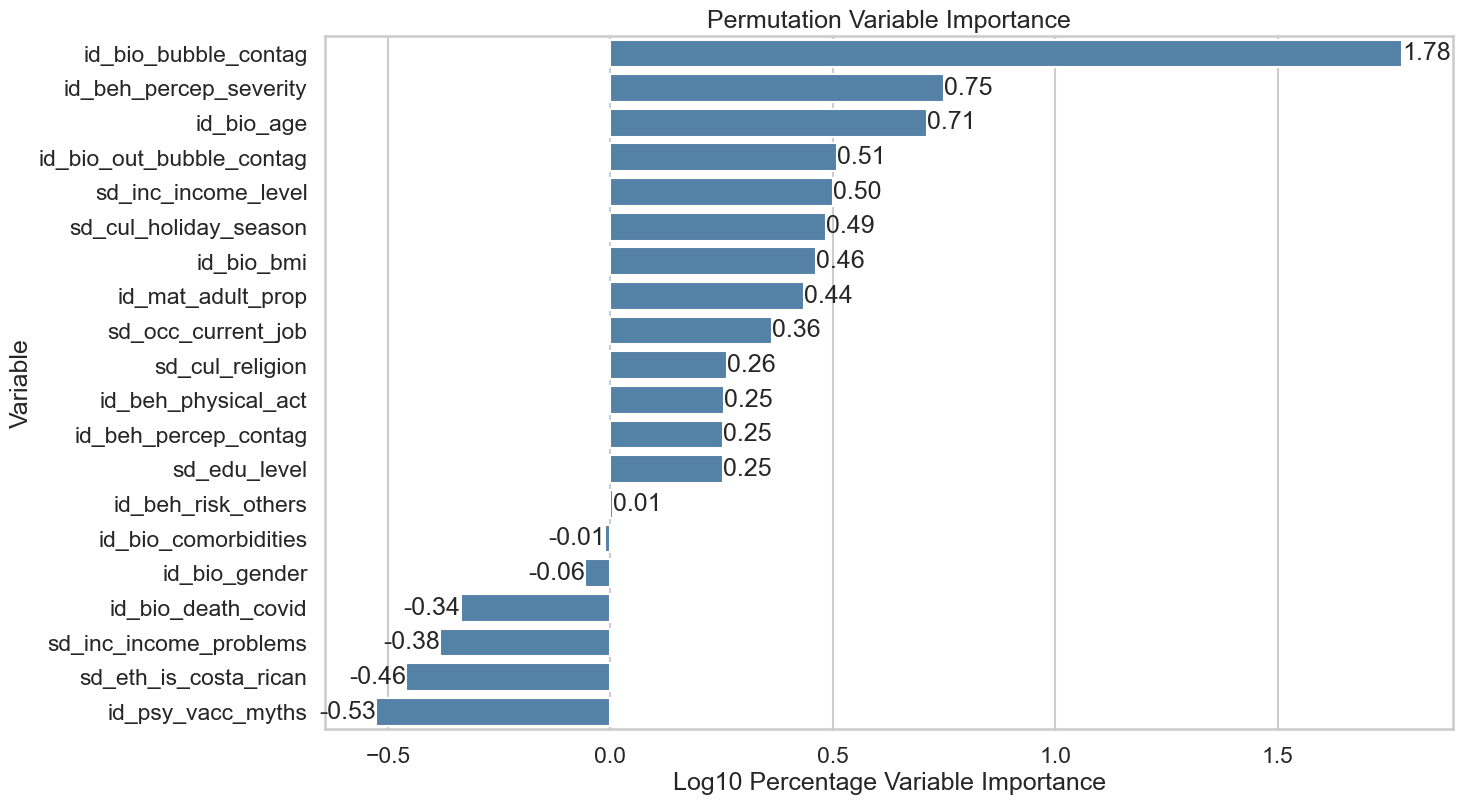

In [85]:
perm_imp = aml_leader.permutation_importance(
    frame=test_h2o, n_repeats=500, metric="PR_AUC", seed=42
)
perm_imp = perm_imp.as_data_frame()
perm_imp["mean"] = perm_imp[perm_imp.columns[1:]].mean(axis=1)
perm_imp = perm_imp.sort_values(by="mean", ascending=False)
perm_imp["Scaled Importance"] = perm_imp["mean"] / perm_imp["mean"].sum()

# perm_imp = perm_imp.as_data_frame()
perm_imp = perm_imp[perm_imp["Scaled Importance"] > 0]
perm_imp["log_scaled_importance"] = np.log10(
    perm_imp["Scaled Importance"] * 100)

h = 9
w = h * 1.618
# Create plot using seaborn
sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(w, h))  # set the figure size
ax = sns.barplot(
    x="log_scaled_importance", y="Variable", data=perm_imp, color="steelblue"
)
ax.bar_label(ax.containers[0], fmt="%.2f")

# Set informative labels for the plot
plt.title("Permutation Variable Importance")
plt.xlabel("Log10 Percentage Variable Importance")
plt.ylabel("Variable")

# Set the x-axis limits to adjust the scale
# plt.xlim(0, 1)

# Save plot to pdf file
plt.savefig("img/plot_perm_imp.pdf", bbox_inches="tight")
plt.show()


<Figure size 1456.2x900 with 0 Axes>

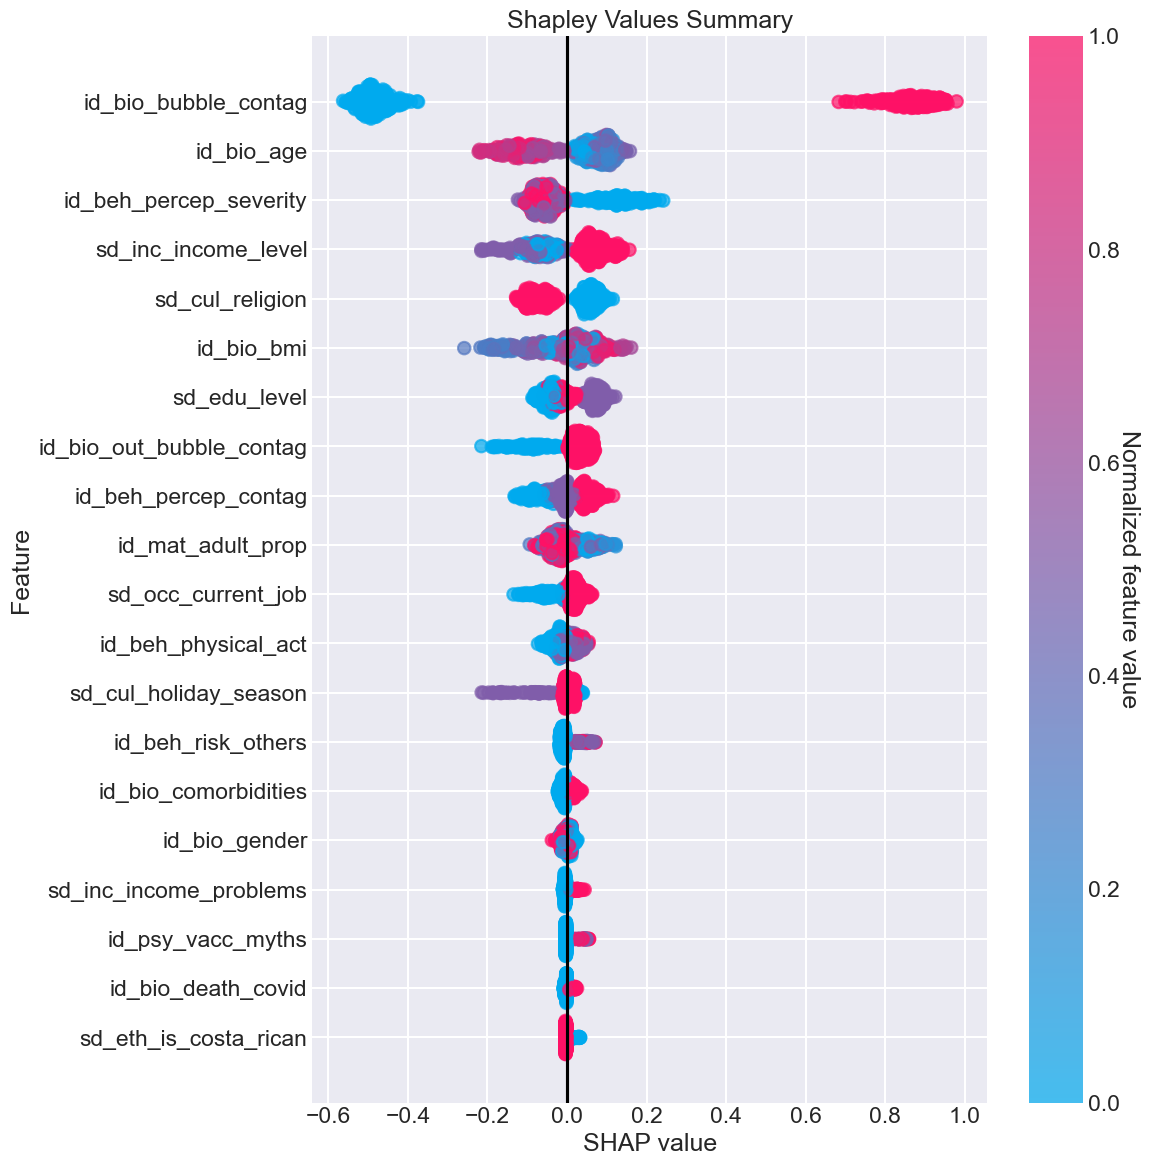

In [75]:
h = 9
w = h * 1.618

plt.style.use("seaborn-v0_8-dark")
plt.figure(figsize=(w, h))  # set the figure size


shap_plot = aml_leader.shap_summary_plot(test_h2o, alpha=0.7)
plt.rcParams.update({"font.size": 30})

plt.title("Shapley Values Summary")
plt.savefig("img/plot_shap.pdf", bbox_inches="tight")


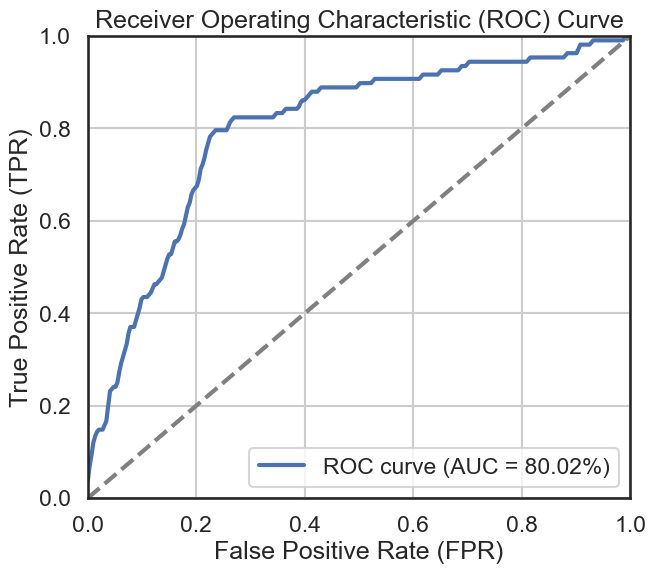

In [76]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

matplotlib.style.use("default")

fprs = perf.fprs
tprs = perf.tprs
auc = perf.auc()

df = pd.DataFrame({"fpr": fprs, "tpr": tprs})
# increase font size

sns.set_theme(style="white")
sns.set_context("talk")
plt.figure(figsize=(7, 6))
sns.lineplot(
    x="fpr",
    y="tpr",
    lw=3,
    data=df,
    err_style=None,
    label="ROC curve (AUC = {:.2%})".format(auc),
)
plt.plot([0, 1], [0, 1], color="gray", lw=3, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_roc.pdf", bbox_inches="tight")

plt.show()


In [77]:
precision = perf.precision(thresholds="all")
recall = perf.recall(thresholds="all")
pr_auc = perf.pr_auc()

precision = [t[1] for t in precision]
recall = [t[1] for t in recall]


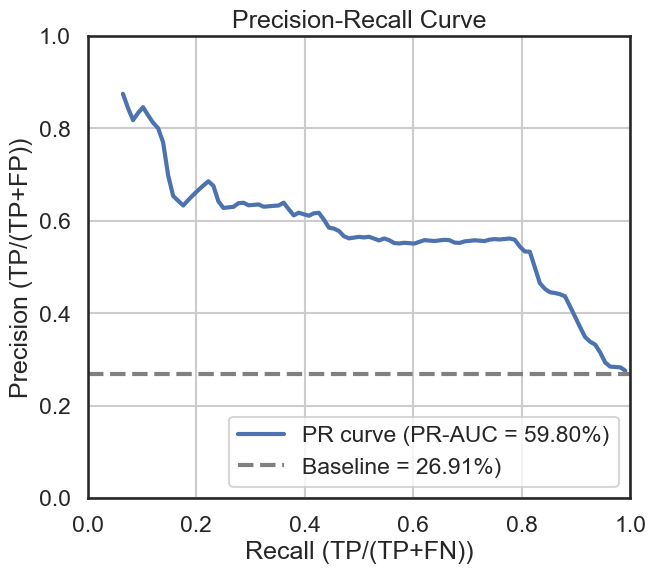

In [78]:
import seaborn as sns
import pandas as pd

precision = perf.precision(thresholds="all")
recall = perf.recall(thresholds="all")
pr_auc = perf.pr_auc()

precision = [t[1] for t in precision]
recall = [t[1] for t in recall]

df = pd.DataFrame({"Recall": recall, "Precision": precision})

df = df.query("Recall >0 & Recall < 1 & Precision >0 & Precision < 1")

sns.set_theme(style="white")
sns.set_context("talk")
plt.figure(figsize=(7, 6))
sns.lineplot(
    x="Recall",
    y="Precision",
    lw=3,
    data=df,
    err_style=None,
    label="PR curve (PR-AUC = {:.2%})".format(pr_auc),
)
plt.plot(
    [0, 1],
    [prevalence, prevalence],
    color="gray",
    lw=3,
    linestyle="--",
    label="Baseline = {:.2%})".format(prevalence),
)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Recall (TP/(TP+FN))")
plt.ylabel("Precision (TP/(TP+FP))")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("img/plot_pr.pdf", bbox_inches="tight")
plt.show()


In [79]:
# Variable importance
aml_leader.varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,id_bio_bubble_contag,353.198364,1.000000,0.770830
1,id_bio_bmi,21.220913,0.060082,0.046313
2,id_bio_age,14.207862,0.040226,0.031008
3,id_mat_adult_prop,11.608115,0.032866,0.025334
4,sd_inc_income_level,10.390538,0.029418,0.022677
5,id_beh_percep_severity,7.978902,0.022590,0.017413
6,sd_edu_level,6.194780,0.017539,0.013520
7,id_bio_out_bubble_contag,5.721537,0.016199,0.012487
8,id_beh_percep_contag,5.205696,0.014739,0.011361
9,sd_occ_current_job,5.035067,0.014256,0.010989


In [80]:
# Permutation importance
aml_leader.permutation_importance(
    frame=test_h2o, n_repeats=5, metric="PR_AUC", use_pandas=True
)


,Run 1,Run 2,Run 3,Run 4,Run 5
Variable,,,,,
id_bio_bubble_contag,0.267809,0.283343,0.280891,0.254931,0.291044
sd_inc_income_level,0.027360,0.011190,0.005183,0.021015,0.008247
id_beh_percep_severity,0.017676,0.035421,0.037908,0.013453,0.051334
id_mat_adult_prop,0.015434,0.000130,0.005642,0.003806,0.000011
sd_edu_level,0.014929,0.004583,0.012438,0.011452,0.003735
id_bio_out_bubble_contag,0.014491,0.025692,0.024073,0.010238,0.025991
id_beh_percep_contag,0.014011,0.000453,0.006348,0.004603,0.001446
id_bio_bmi,0.009511,0.029265,0.014256,0.001534,0.002826
id_bio_age,0.009087,0.030372,0.014664,0.017216,0.002798


Cálculo sin burbuja

In [81]:
# Guardar parametros
model_parameters = pd.DataFrame(
    {
        "prevalence": [prevalence],
        "threshold": [threshold],
        "sens_model": sensitivity,
        "spec_model": specificity,
        "people": test_h2o.nrow,
    }
)
print(model_parameters)
model_parameters.to_pickle(path="data/model_parameters.pkl")


   prevalence  threshold  sens_model  spec_model  people
0    0.269096   0.328541    0.796296    0.767918     401
